# **Project Name**    - **Credit Card Default Prediction**



##### **Project Type**  - Classification
##### **Contribution**    - Individual(Ankita Gupta)

# **Project Summary -**

**Data preprocessing:**
1. Getting the dataset
2. Importing libraries
3. Importing Dataset
4. Finding Missing Data
5. Encoding categorical data
6. Data cleaning and feature engineering

**Exploratory Data Analysis(EDA)**
1. Firstly checked distribution of target variables and independent variables.
2. Checked number of values in categorical features.
3. Replaced the values that are lowest in categorical features.
4. Replaced the other values with a particular value in some numerical features such as pay status.
5. Dummyfied the categorical features.
6. Checked correlation to see if there are any highly correlated independent features.

**Supervised Machine learning algorithms and implementation:**
1. K nearest neighbours
2. Logistic Regression
3. Decision Tree
4. XG boost classifier
5. Random Forest Classifier



# **GitHub Link -**

https://github.com/ankitagupta010/Credit_card_default_prediction

# **Problem Statement**


Defaulted credit card refers to a solution where a credit card holder fails to make the required minimum payments on their credit card account for a certain period of time, typically several consecutive month. As a result, the credit card issuer or the lending institution consider the account in default and takes action to recover the outstanding balance. However if the credit card issuer or the lending institution is not able to recover the outstanding then its a financial loss to them and also on the other hand it impacts the customers in a negative way to their credit score as well as credit profile. So in this project our aim will be to build a model which will help top predict whether a customer will default the payment of his/her credit card so that the banks can understand the characteristics that lead to this outcome.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns', 100)


import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score




```
# This is formatted as code
```

### Dataset Loading

In [2]:
# Load Dataset
Cr = ("/content/default of credit card clients.xls")
Cr_df = pd.read_excel(Cr)

### Dataset First View

In [3]:
# Dataset First Look
Cr_df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
rename_list= ['ID','LIMIT_BAL','SEX', 'EDUCATION','MARRIAGE', 'AGE',  'PAY_0',
              'PAY_2',  'PAY_3',  'PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5',  'BILL_AMT6',  'PAY_AMT1',
              'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']
col_rename = dict(zip(Cr_df.columns, rename_list))
Cr_df = Cr_df.rename(columns=col_rename)


In [5]:
Cr_df=Cr_df.drop(Cr_df.index[[0]],axis=0)

In [6]:
Cr_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
Cr_df.shape

(30000, 25)

### Dataset Information

In [8]:
# Dataset Info
Cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         30000 non-null  object
 1   LIMIT_BAL  30000 non-null  object
 2   SEX        30000 non-null  object
 3   EDUCATION  30000 non-null  object
 4   MARRIAGE   30000 non-null  object
 5   AGE        30000 non-null  object
 6   PAY_0      30000 non-null  object
 7   PAY_2      30000 non-null  object
 8   PAY_3      30000 non-null  object
 9   PAY_4      30000 non-null  object
 10  PAY_5      30000 non-null  object
 11  PAY_6      30000 non-null  object
 12  BILL_AMT1  30000 non-null  object
 13  BILL_AMT2  30000 non-null  object
 14  BILL_AMT3  30000 non-null  object
 15  BILL_AMT4  30000 non-null  object
 16  BILL_AMT5  30000 non-null  object
 17  BILL_AMT6  30000 non-null  object
 18  PAY_AMT1   30000 non-null  object
 19  PAY_AMT2   30000 non-null  object
 20  PAY_AMT3   30000 non-null  o

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
Cr_df.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
Cr_df.isna().sum().sort_values(ascending=False)

ID           0
BILL_AMT2    0
PAY_AMT6     0
PAY_AMT5     0
PAY_AMT4     0
PAY_AMT3     0
PAY_AMT2     0
PAY_AMT1     0
BILL_AMT6    0
BILL_AMT5    0
BILL_AMT4    0
BILL_AMT3    0
BILL_AMT1    0
LIMIT_BAL    0
PAY_6        0
PAY_5        0
PAY_4        0
PAY_3        0
PAY_2        0
PAY_0        0
AGE          0
MARRIAGE     0
EDUCATION    0
SEX          0
default      0
dtype: int64

Text(0.5, 1.0, 'Visualising Missing Values')

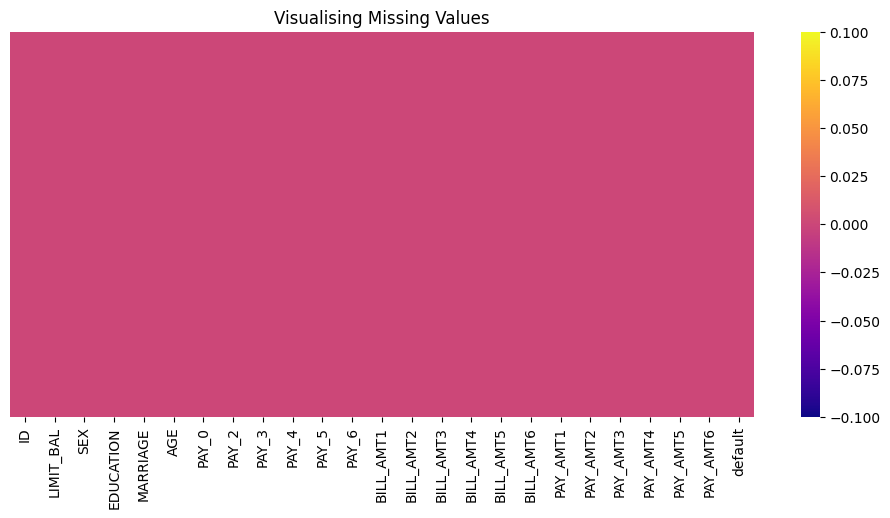

In [11]:
# Visualizing the missing values
plt.figure(figsize=(12,5))
sns.heatmap(Cr_df.isnull(),cmap='plasma',annot=False, yticklabels=False)
plt.title("Visualising Missing Values")

### What did you know about your dataset?

There are no missing values in the dataset. The given dataset contains 30000 rows and 25 columns. There are 24 independent variables and 1 target variable in our dataset. The initial problem was reading the information as it was indicated column name as X and Y, so we have renamed it. 'Default' is our target variable that we have to predict.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
Cr_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [13]:
# Dataset Describe
Cr_df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,30000,81,2,7,4,56,11,11,11,11,10,10,22723,22346,22026,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,1,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,1,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Variables Description

The name of the individual variables and descriptions of them mentioned below:


**ID**: ID of each client

**LIMIT_BAL**: Amount of given credit by customers

**SEX**: Gender(1=male, 2=female)

**EDUCATION**: Qualification of the customers(1=graduate school, 2=university,3= high school, 4=others, 5=unknown, 6=unknown)

**MARRIAGE**: Marital status (1=married,2=single,3=others)

**AGE**: Age in years

**PAY_0**:Repayment status in September,2005(-1=pay duly, 1=payment delay for one month,2=payment delay for two month,..8= payment delay for eight months, 9=payment delay for nine months and above)

**PAY_2**:Repayment status in August, 2005(scale same as above)

**PAY_3**:Repayment status in July, 2005(scale same as above)

**PAY_4**:Repayment status in June, 2005(scale same as above)

**PAY_5**:Repayment status in May, 2005(scale same as above)

**PAY_6**:Repayment status in April, 2005(scale same as above)

**Bill_AMT1**:Amount of bill statement in September,2005(NT dollar)

**Bill_AMT2**:Amount of bill statement in August,2005(NT dollar)

**Bill_AMT3**:Amount of bill statement in July,2005(NT dollar)

**Bill_AMT4**:Amount of bill statement in June,2005(NT dollar)

**Bill_AMT5**:Amount of bill statement in May,2005(NT dollar)

**Bill_AMT6**:Amount of bill statement in April,2005(NT dollar)

**PAY_AMT1**:Amount of previous payment in September,2005(NT dollar)

**PAY_AMT2**:Amount of previous payment in August,2005(NT dollar)

**PAY_AMT3**:Amount of previous payment in July,2005(NT dollar)

**PAY_AMT4**:Amount of previous payment in June,2005(NT dollar)

**PAY_AMT5**:Amount of previous payment in May,2005(NT dollar)

**PAY_AMT6**:Amount of previous payment in April,2005(NT dollar)

**default.payment.next.month**:Default payment(1=yes,0=no)


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable
Cr_df.nunique()

ID           30000
LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_0           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
default          2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
#changing all values from objects to
Cr_df = Cr_df.apply(pd.to_numeric,errors='coerce')


In [16]:
Cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [17]:
Cr_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [18]:
#Droping the ID column as it is not important for the analysis
Cr_df.drop(["ID"], axis=1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [19]:
Cr_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#categorical variables
We have few categorical features in our dataset. Lets check how they are related with our target class.


**SEX**



*   1 - Male
*   2 - Female

In [20]:
Cr_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

**Education**

1=Graduate school;  2=university;  3=high school;  4=others

In [21]:
Cr_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [22]:
#Fixing the education column for the values of 5,6 and 0 by 4
fil= (Cr_df['EDUCATION']==5) | (Cr_df['EDUCATION']==6) | (Cr_df['EDUCATION']==0)
Cr_df.loc[fil,'EDUCATION']=4
Cr_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

**Marriage**

1 = married;  2 = single;  3 = others

In [23]:
Cr_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Fixing the 'marital status' by replacing the values of 0  with 3.

In [24]:
fil= (Cr_df['MARRIAGE']==0)
Cr_df.loc[fil,'MARRIAGE']=3
Cr_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### What all manipulations have you done and insights you found?

First the entire data was changed to integer type information. There are three categorical variables in the data as 'Gender', 'Education', 'marital status'. The gender column has only two values as 1 and 2 which is fine. But the Education and Marital status has more varities, so i have replaced the unknown values in those columns with the lowest value category.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

**Target Variable**
We will visualize the target column "default" to figure out how imbalance(balance) the data is

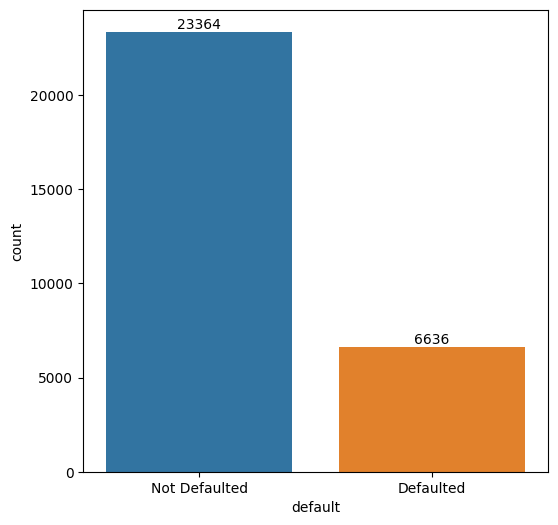

In [25]:
# Chart - 1 visualization code
plt.figure(figsize=(6,6))
ax=sns.countplot(x =Cr_df['default'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Not Defaulted", "Defaulted"])
plt.show()

##### 1. Why did you pick the specific chart?

**To represent the occurrence of the observation present in the categorical variable.**

##### 2. What is/are the insight(s) found from the chart?

**This data is quite imbalance which about 22% of clients will default next month.**

#### Chart - 2

**SEX Variable:**

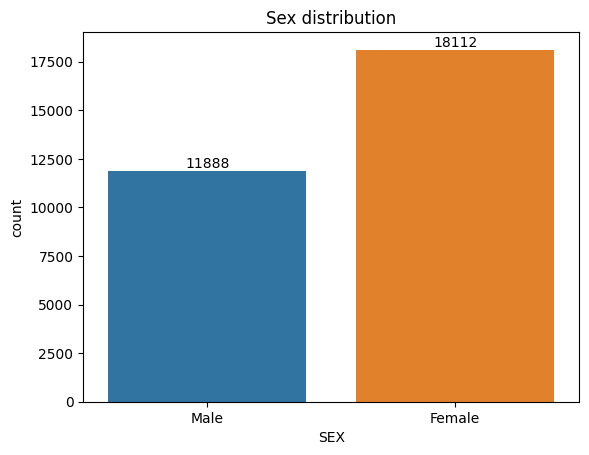

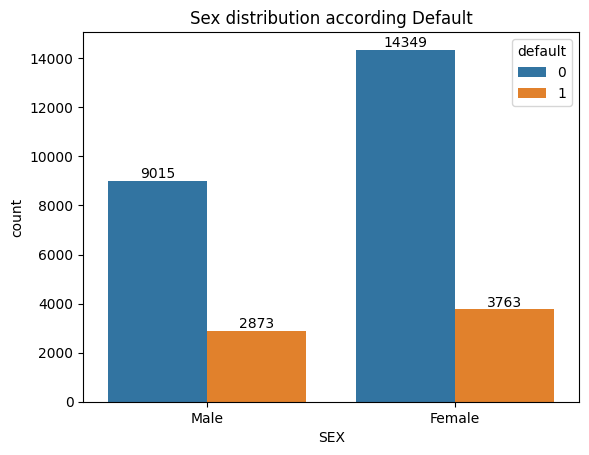

In [26]:
# Chart - 2 visualization code
ax=sns.countplot(x=Cr_df['SEX'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex distribution")
plt.show()

ax=sns.countplot(data=Cr_df, x="SEX", hue="default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Sex distribution according Default")
plt.show()

##### 1. Why did you pick the specific chart?

To visualize the categorical variables.

##### 2. What is/are the insight(s) found from the chart?

More Female clients own credit card than Male client.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

24% of male clients fraud credit card while the ratio for female is around 20%.

#### Chart - 3

**EDUCATION VARIABLE**

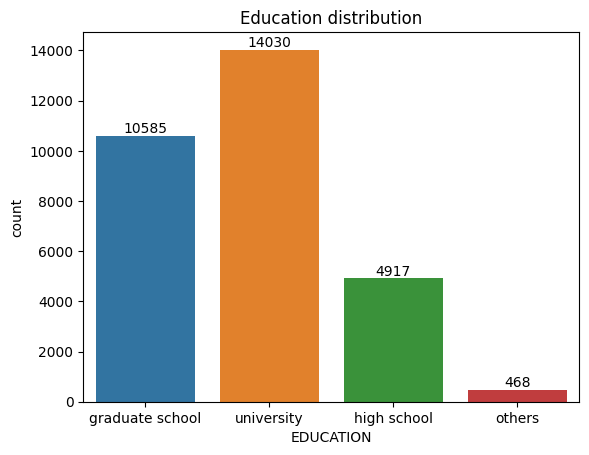

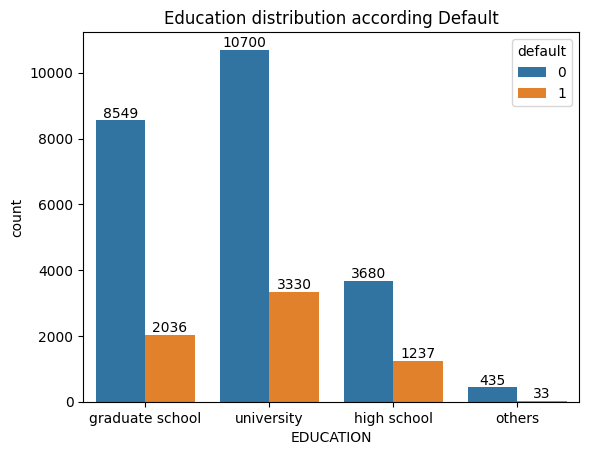

In [27]:
# Chart - 3 visualization code
ax=sns.countplot(x=Cr_df['EDUCATION'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school","university","high school","others"])
plt.title("Education distribution")
plt.show()

ax=sns.countplot(data=Cr_df, x="EDUCATION", hue="default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["graduate school","university","high school","others"])
plt.title("Education distribution according Default")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

University students are the group which highest number customers using credit cards(47%)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High school students are the group which has highest fraud cases(25%), follow by university students(23%).

#### Chart - 4

**Marriage Status Variable**

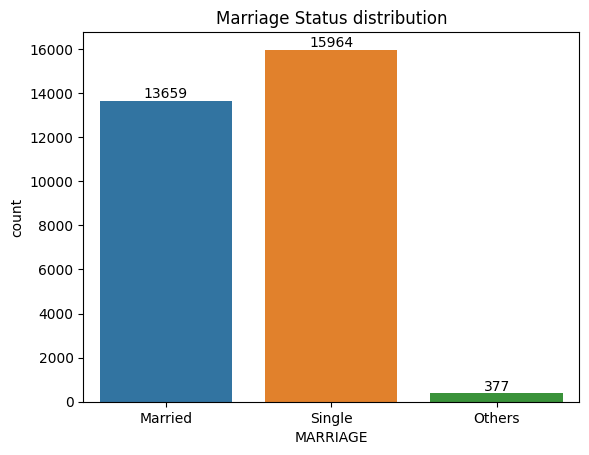

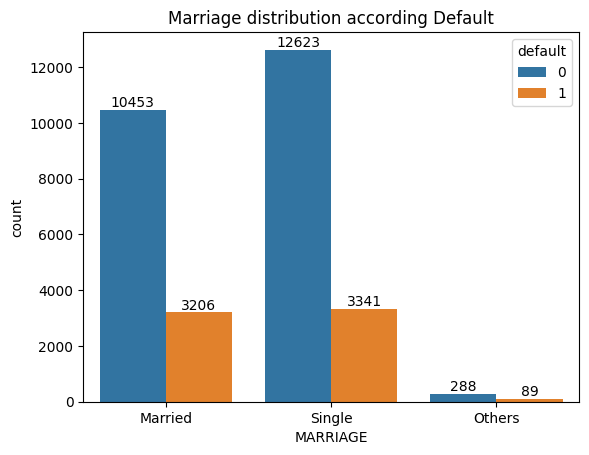

In [28]:
# Chart - 4 visualization code
ax=sns.countplot(x=Cr_df['MARRIAGE'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["Married","Single","Others"])
plt.title("Marriage Status distribution")
plt.show()

ax=sns.countplot(data=Cr_df, x="MARRIAGE", hue="default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["Married","Single","Others"])
plt.title("Marriage distribution according Default")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

Single is the group which highest number of customers using credit cards(53%).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Married people are the group which has highest fraud cases(30).

#### Chart - 5

**AGE VARIABLE**

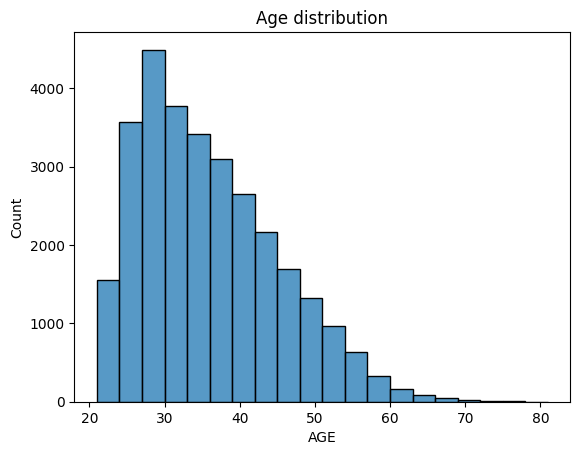

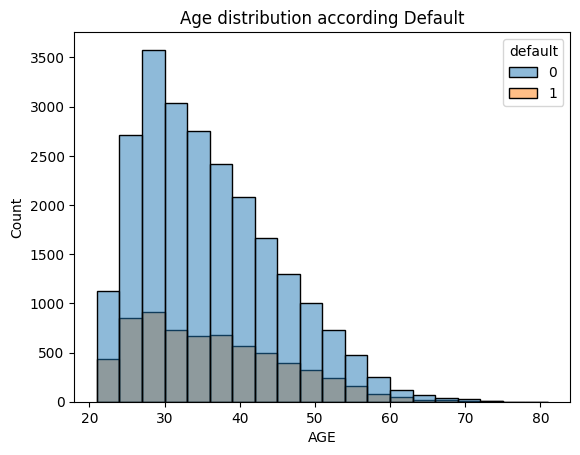

In [29]:
# Chart - 5 visualization code
sns.histplot(data=Cr_df, x="AGE", binwidth=3)
plt.title("Age distribution")
plt.show()

sns.histplot(data=Cr_df, x="AGE", hue="default", binwidth=3)
plt.title("Age distribution according Default")
plt.show()


##### 1. Why did you pick the specific chart?

It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

Histogram is right-skewed meaning the older customers are likely to use credit cards.
The main clients is in their 30s.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers in their 30s are also the most prone to credit fraud.

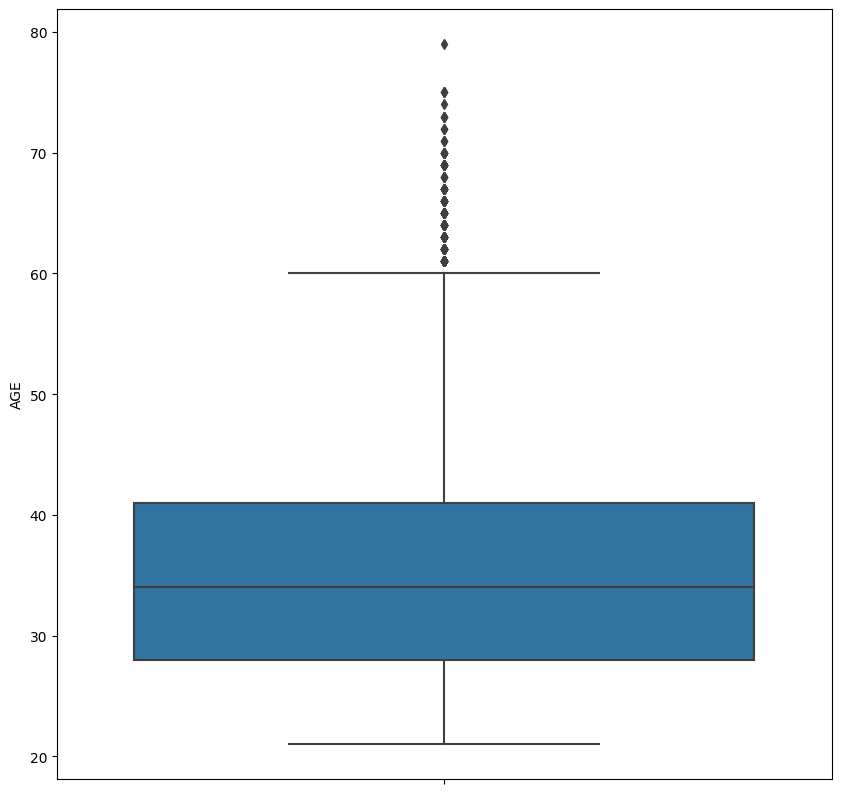

In [30]:
plt.figure(figsize=(10,10))
ax = sns.boxplot( y="AGE", data=Cr_df)

In [31]:
#outlier treatment
#applying IQR technique
df_scores = pd.DataFrame(Cr_df,columns=['AGE'])


In [32]:
df_scores.describe()

,AGE
count,30000.000000
mean,35.485500
std,9.217904
min,21.000000
25%,28.000000
50%,34.000000
75%,41.000000
max,79.000000


In [33]:
IQR = 67-24
lower_limit = 24 - 1.5*IQR
upper_limit = 67 + 1.5*IQR
print(upper_limit)
print(lower_limit)

131.5
-40.5


In [34]:
df_scores_filtered = df_scores[(df_scores['AGE']>lower_limit) & (df_scores['AGE']<upper_limit)]
print(df_scores_filtered)

       AGE
1       24
2       26
3       34
4       37
5       57
...    ...
29996   39
29997   43
29998   37
29999   41
30000   46

[30000 rows x 1 columns]


In [35]:
q25,q75 = np.percentile(a = df_scores,q=[25,75])
IQR = q75 - q25
print(IQR)

13.0


In [36]:
lower_limit, upper_limit = np.percentile(a=df_scores,q=[25,75])
print(upper_limit)
print(lower_limit)

41.0
28.0


In [37]:
df_scores_filtered = df_scores[(df_scores['AGE']>lower_limit) & (df_scores['AGE']<upper_limit)]
print(df_scores_filtered)

       AGE
3       34
4       37
6       37
7       29
10      35
...    ...
29992   34
29994   38
29995   34
29996   39
29998   37

[13713 rows x 1 columns]


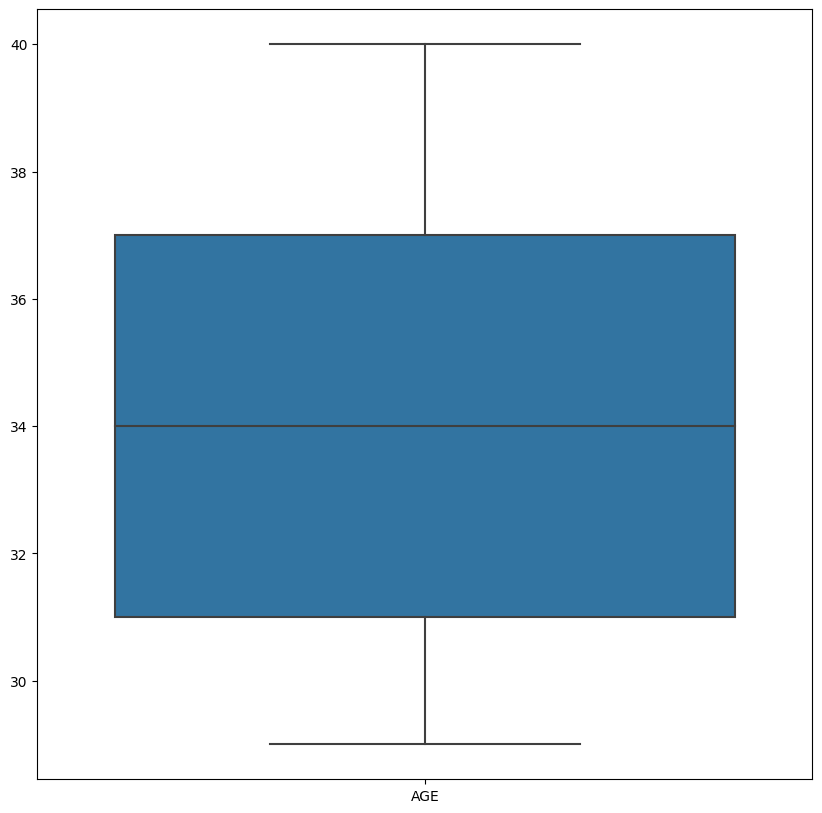

In [38]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(df_scores_filtered)

What all outliers treatment techniques have you used ? And Why.

The boxplot of the numerical features are plotted in order to have a further look at the distribution and to eventually spot outliers.
It can be clearly seen that there are lot of values which are lying in the outlier section. So to tackle the outliers I applied IQR(Interquartile Range) technique to the AGE data, because it shows clear outliers.

####Chart-6

**Limit_Bal Variable**

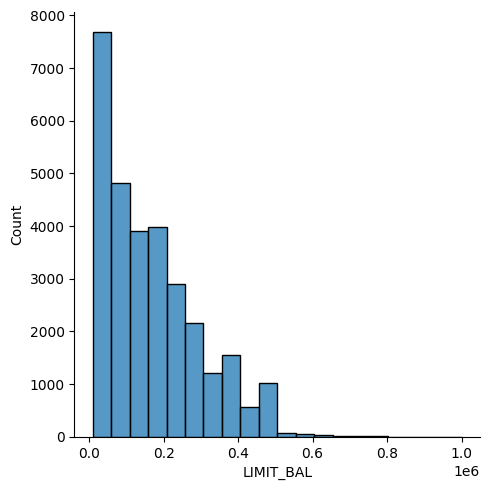

In [39]:
# Chart - 6 visualization code
sns.displot(Cr_df.LIMIT_BAL,bins=20,kde=False)

##### 1. Why did you pick the specific chart?

The distplot function in the seaborn library is used to visualize the distribution of univariate (single-variable) sets of observations.

##### 2. What is/are the insight(s) found from the chart?

The average limit balance is around 4000-5000.

#### Chart - 7

**Amount of bill statement and Amount of previous payment**

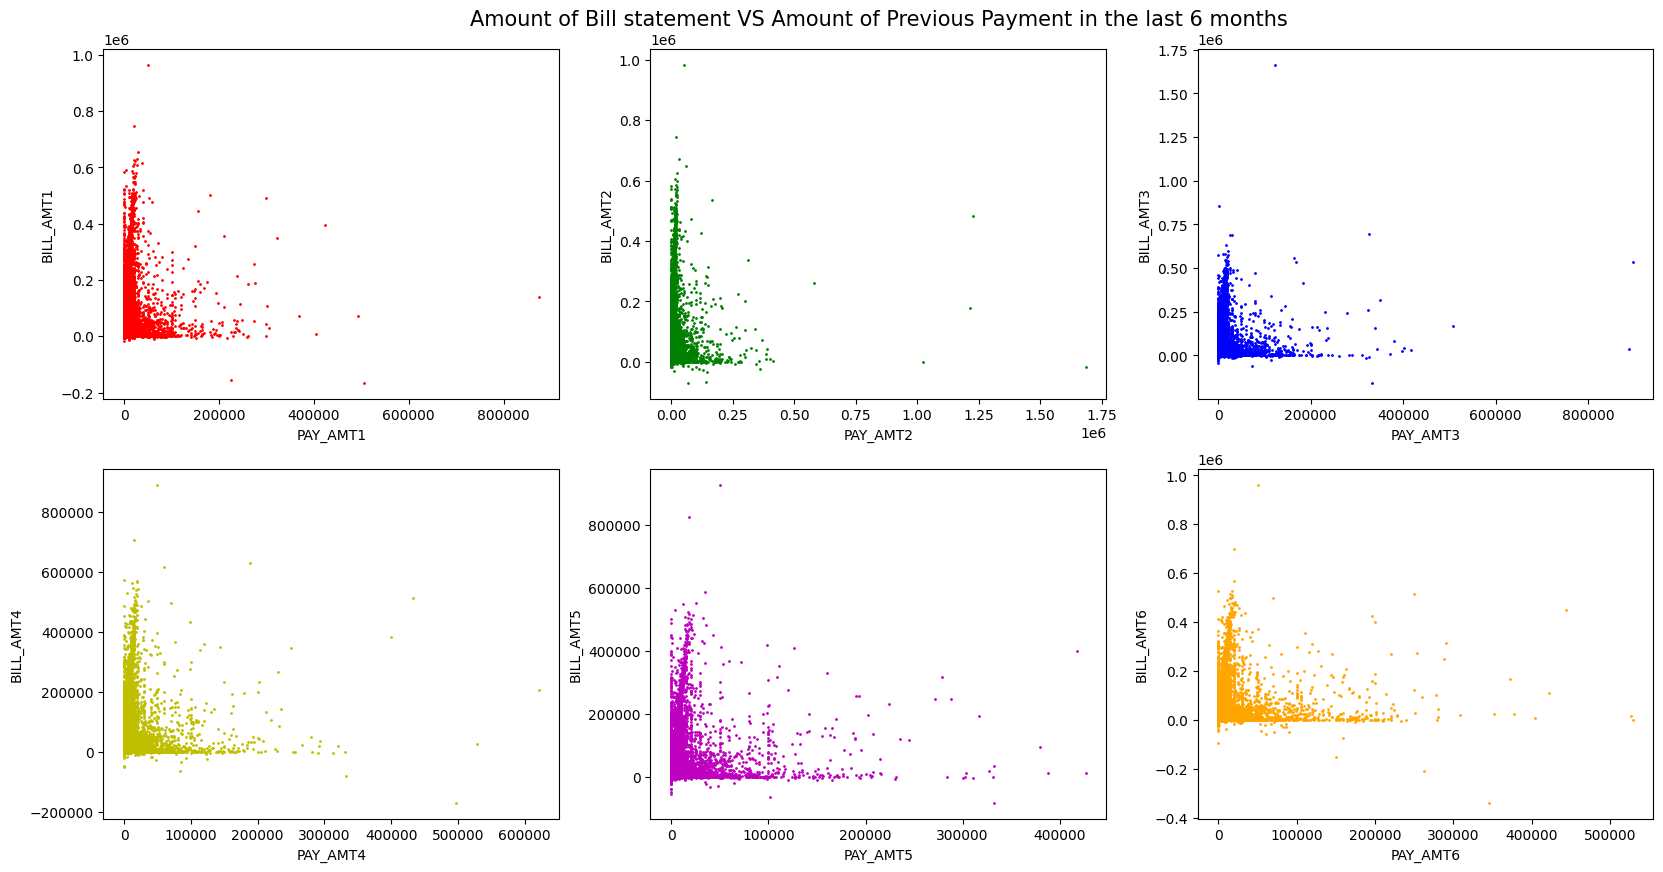

In [40]:
# Chart - 7 visualization code
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=Cr_df.PAY_AMT1, y=Cr_df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')


plt.subplot(232)
plt.scatter(x=Cr_df.PAY_AMT2, y=Cr_df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Amount of Bill statement VS Amount of Previous Payment in the last 6 months', fontsize=15)


plt.subplot(233)
plt.scatter(x=Cr_df.PAY_AMT3, y=Cr_df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')


plt.subplot(234)
plt.scatter(x=Cr_df.PAY_AMT4, y=Cr_df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=Cr_df.PAY_AMT5, y=Cr_df.BILL_AMT5, c='m', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=Cr_df.PAY_AMT6, y=Cr_df.BILL_AMT6, c='orange', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.  

##### 2. What is/are the insight(s) found from the chart?

As I have plotted the Amount of Bill statement VS Amount of Previous Payment in the last 6 months.

#### Chart - 8

**Correlation Analysis**

<Axes: >

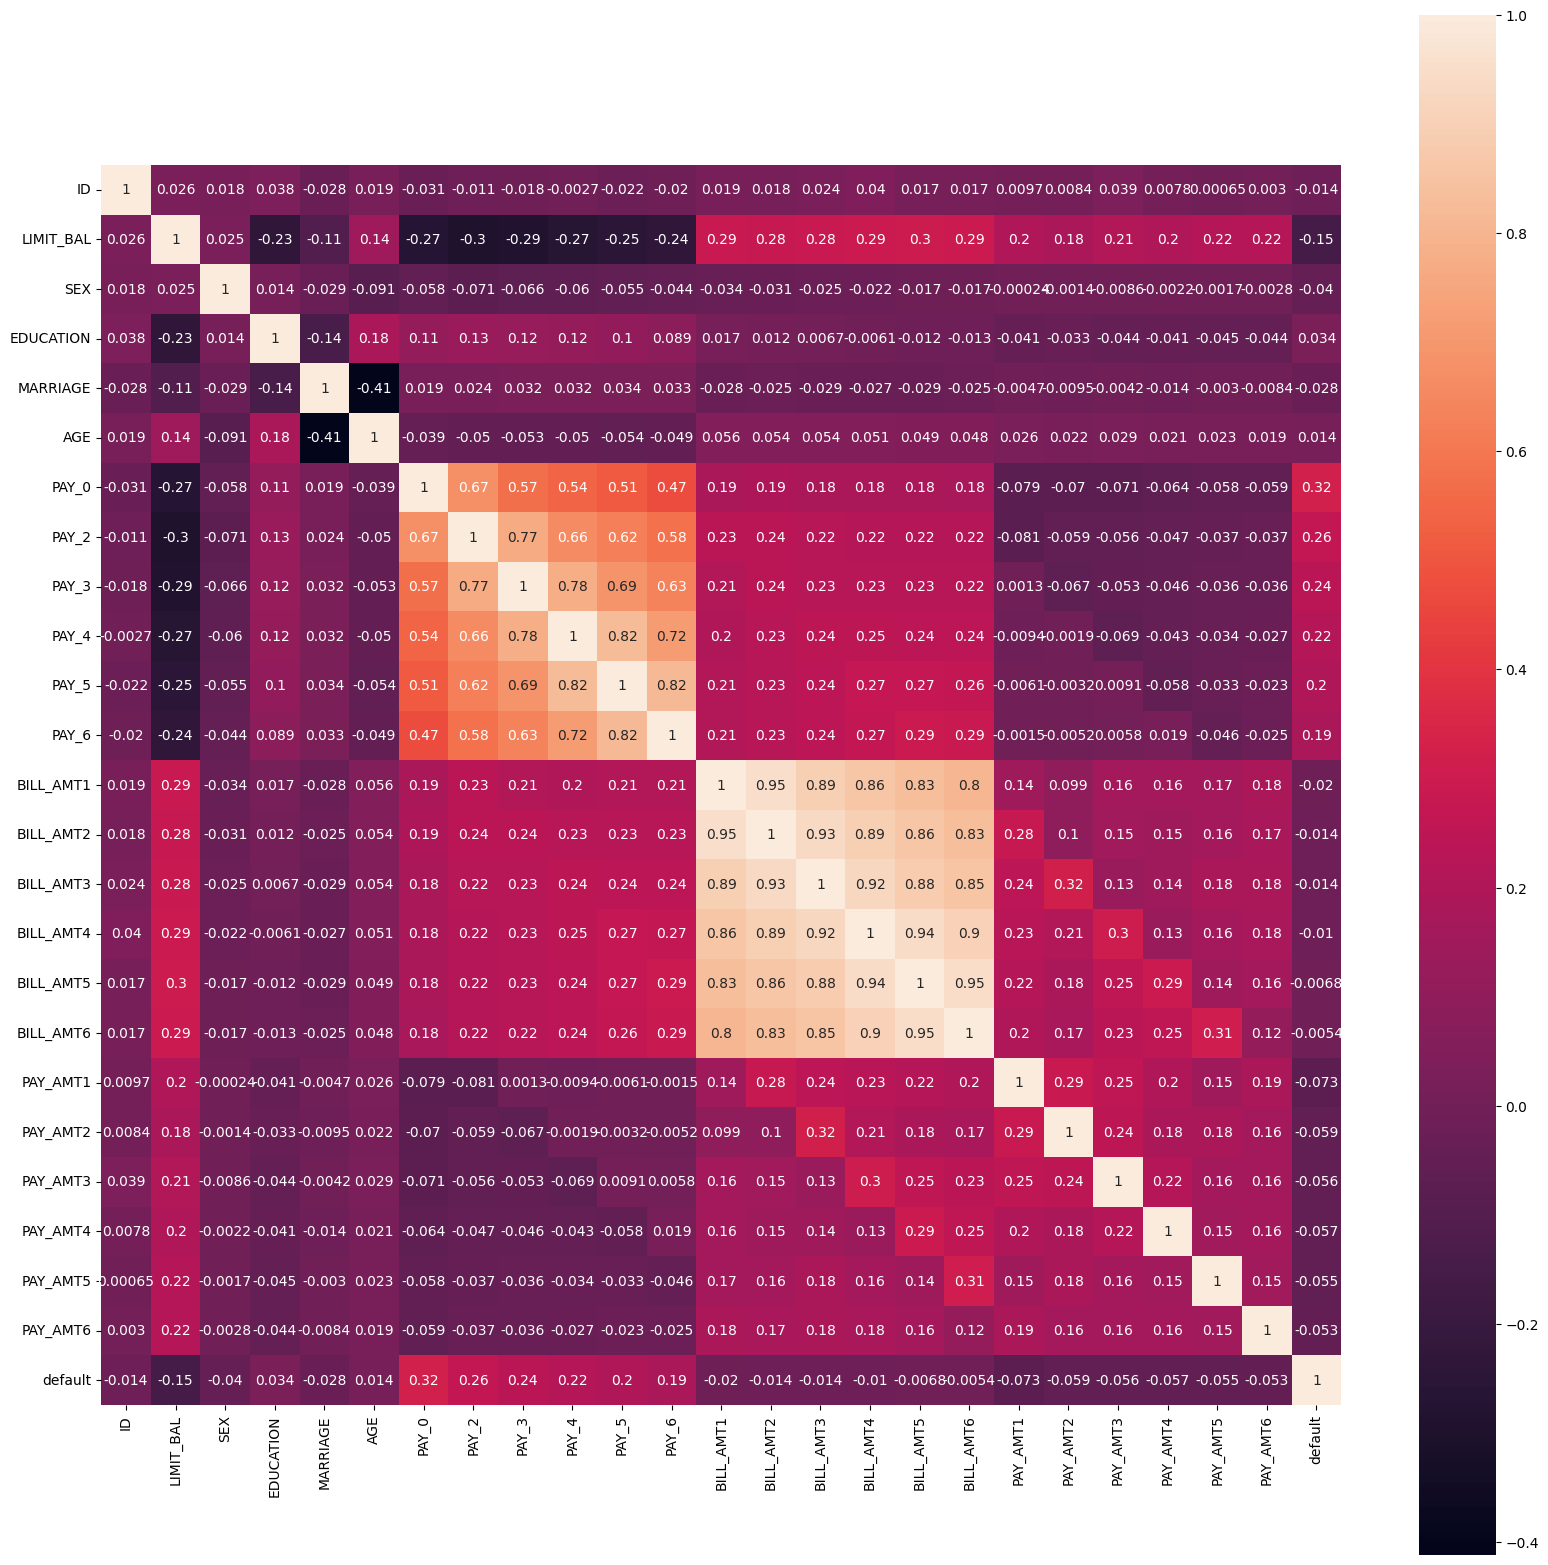

In [41]:
# Chart - 8 visualization code
plt.figure(figsize=(20,20))
sns.heatmap(Cr_df.corr(), annot=True, square=True)

##### 1. Why did you pick the specific chart?

To check the multicollinearity problem the above chart is used.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation plot we can see that bill_amt6 to bill_amt1 are highly correlated to each other.

#### Chart - 9

**Data transformation**

In [42]:
# Chart - 9 visualization code
Cr_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [43]:
x= Cr_df.drop(['default'], axis=1)
y= Cr_df['default']
x.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Data scaling

In [44]:
#scaling your data
from sklearn.preprocessing import StandardScaler
x= StandardScaler().fit_transform(x)

In [45]:
x

array([[-1.73199307, -1.13672015,  0.81016074, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-1.7318776 , -0.3659805 ,  0.81016074, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-1.73176213, -0.59720239,  0.81016074, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [ 1.73176213, -1.05964618, -1.23432296, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [ 1.7318776 , -0.67427636, -1.23432296, ..., -0.18512036,
         3.15253642, -0.19190359],
       [ 1.73199307, -0.90549825, -1.23432296, ..., -0.24422965,
        -0.24868274, -0.23713013]])

**Balancing the data**

The SMOTE algorithm work like this:


You select a random sample from the minority group. You will determine the k nearest neighbours for the observations in this sample. Then, using one of those neighbours, you will determine the vector between the current data point and the chosen neighbour. The vector is multiplied by a random number between 0 and 1. You add this to the current data point to get the synthetic data point. This operation is essentially the same as moving the data point slightly in the direction of its neighbour. This ensures that it is not too dissimilar from known observations in your minority class.

**Data splitting**

In [46]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20, random_state=42)

What data splitting ratio have you used and why?

I have made the use of 80% and 20% Training and Testing data respectively. The data should be devided in such a way that neither of them is too high, which is more dependent on the amount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross validation, but if the data is huge then it doesn't really matter whether we choose 80-20 split or 90-10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

**Handling Imbalanced Dataset**

In [47]:
Cr_df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

Do you think the dataset is imbalanced? Explain why.

Yes.There is a class imbalance in target variable. However we have already visualized same in the exploratory data analysis section by using barplot.

In [48]:
##summarize class distribution
import collections
from imblearn.over_sampling import SMOTE

print("Before oversampling:",collections.Counter(y_train))
SMOTE=SMOTE()

x_train,y_train=SMOTE.fit_resample(x_train,y_train)

#summarize class distribution
print("After oversampling:",collections.Counter(y_train))

Before oversampling: Counter({0: 18677, 1: 5323})
After oversampling: Counter({0: 18677, 1: 18677})


#### Chart - 10

**Building Model:**

Logistic Regression

Random Forest Classifier

Decision Tree

XGBoost Classifier

**a) Logistic Regression**


              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.65      0.47      1313

    accuracy                           0.68      6000
   macro avg       0.62      0.67      0.62      6000
weighted avg       0.77      0.68      0.71      6000

confusion matrix of logistic regression
Logistic accuracy: 0.6835


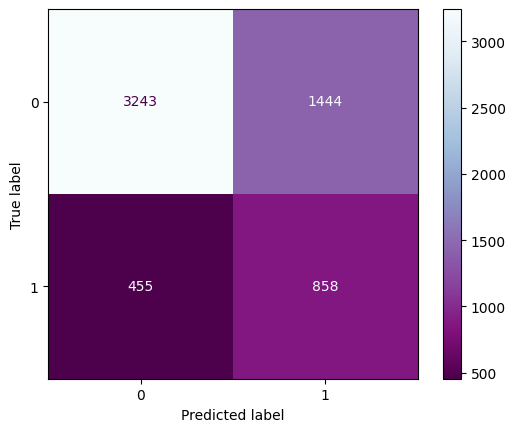

In [49]:
from sklearn.svm import SVC
logit= LogisticRegression()
logit.fit(x_train,y_train)

pred_logit=logit.predict(x_test)

print(classification_report(y_test, pred_logit))

print('confusion matrix of logistic regression')

print("Logistic accuracy:", accuracy_score(y_test, pred_logit))
clf = SVC(random_state=0)
clf.fit(x_train, y_train)
ConfusionMatrixDisplay.from_estimator(logit,x_test, y_test, cmap="BuPu_r")
plt.show()


#### Chart - 11

**b) Decision Tree Classifier:**

Decision Tree Accuracy: 0.721
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      4687
           1       0.40      0.53      0.46      1313

    accuracy                           0.72      6000
   macro avg       0.63      0.65      0.63      6000
weighted avg       0.76      0.72      0.73      6000

confusion matrix of decision tree


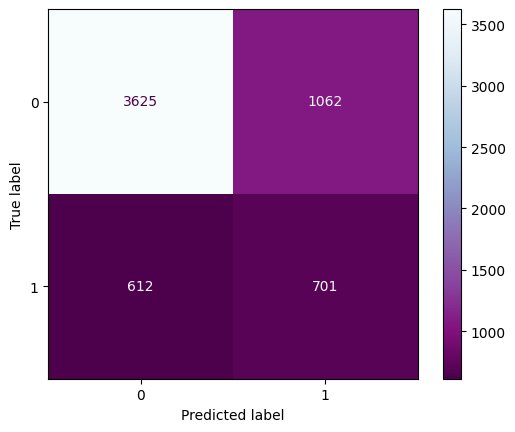

In [50]:
# Chart - 11 visualization code
Tree = DecisionTreeClassifier(criterion= 'gini', max_depth=7,
                              max_features=9, min_samples_leaf=2, random_state=0)

Tree.fit(x_train, y_train)
pred_tree= Tree.predict(x_test)
print('Decision Tree Accuracy:', accuracy_score(y_test,pred_tree))

print(classification_report(y_test, pred_tree))

print('confusion matrix of decision tree')
ConfusionMatrixDisplay.from_estimator(Tree,x_test, y_test, cmap="BuPu_r")
plt.show()

#### Chart - 12

**c) Random Forest:**

Random Forest Accuracy is: 0.7941666666666667
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.54      0.45      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000



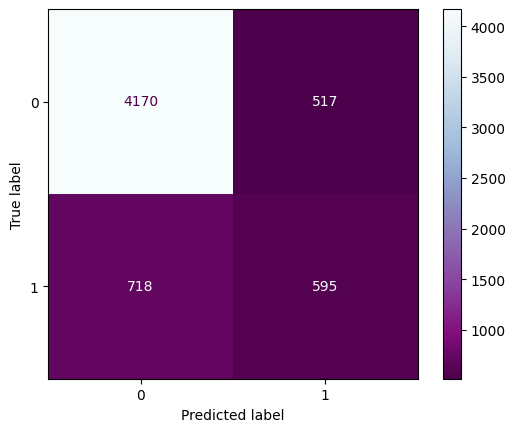

In [51]:
# Chart - 12 visualization code
RF= RandomForestClassifier()

RF.fit(x_train, y_train)

pred_RF= RF.predict(x_test)
print("Random Forest Accuracy is:", accuracy_score(y_test, pred_RF))

print(classification_report(y_test, pred_RF))

ConfusionMatrixDisplay.from_estimator(RF,x_test, y_test, cmap="BuPu_r")
plt.show()

#### Chart - 13

**d) XGBoost:**

XGBoost Accuracy: 0.8013333333333333
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4687
           1       0.56      0.41      0.48      1313

    accuracy                           0.80      6000
   macro avg       0.70      0.66      0.68      6000
weighted avg       0.78      0.80      0.79      6000



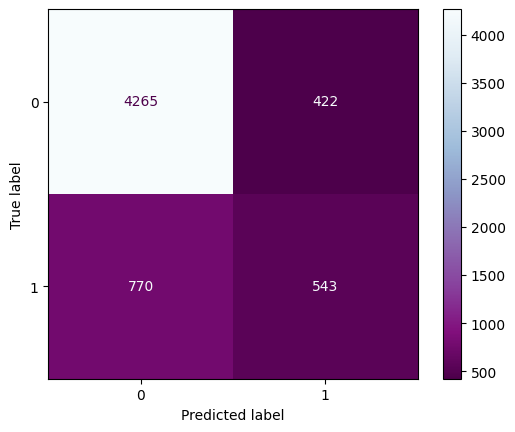

In [52]:
# Chart - 13 visualization code
xgboost= xgb.XGBClassifier()

xgboost.fit(x_train, y_train)

pred_xgboost= xgboost.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, pred_xgboost))
print(classification_report(y_test, pred_xgboost))
ConfusionMatrixDisplay.from_estimator(xgboost,x_test, y_test, cmap="BuPu_r")
plt.show()

#### Chart - 14

**Hyper parameter tuning:**

In [53]:
# Hyper Parameter Optimization

params={
    "learning_rate"   :[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth"       :[3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight":[1, 3, 5, 7],
    "gamma"           :[0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree":[0.3, 0.4, 0.5, 0.7]
}

In [54]:
random_search= RandomizedSearchCV(xgboost,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [55]:
#best estimators:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
#best param
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 15,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 0.4}

In [57]:
classifier=XGBClassifier(objective='binary:logistic',
                                     min_child_weight=3,
                                     max_depth=10,
                                     learning_rate=0.25,
                                    gamma=0.1,
                                    colsample_bynode=1,
                                    colsample_bytree=0.4,
                                    use_label_encoder=False)
#fitting the model
classifier.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=1, colsample_bytree=0.4,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.25, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [58]:
#predicting model
hyper_pred=classifier.predict(x_test)

print("The accuracy of the model is:", accuracy_score(y_test, hyper_pred))

The accuracy of the model is: 0.7983333333333333


**Compare Model Performance:**

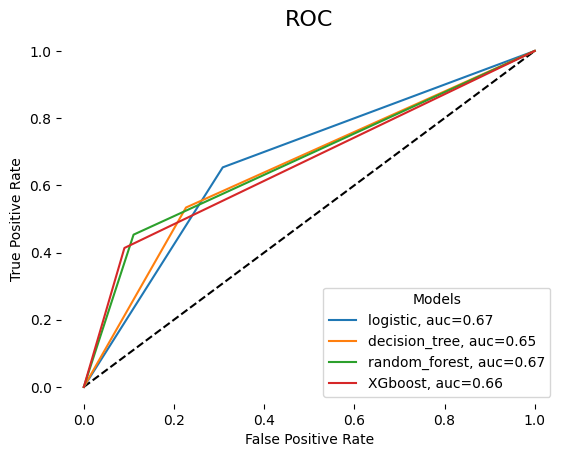

In [59]:
#logistic model
pred_logit= logit.predict(x_test)
fpr1, tpr1, thresholds=metrics.roc_curve(y_test, pred_logit)
auc1= metrics.roc_auc_score(y_test, pred_logit)

#decision tree model
pred_Tree= Tree.predict(x_test)
fpr2, tpr2, thresholds=metrics.roc_curve(y_test, pred_tree)
auc2= metrics.roc_auc_score(y_test, pred_tree)

#random forest model
pred_RF= RF.predict(x_test)
fpr3, tpr3, thresholds= metrics.roc_curve(y_test, pred_RF)
auc3= metrics.roc_auc_score(y_test, pred_RF)

#XGboost:
pred_xgboost= xgboost.predict(x_test)
fpr4, tpr4, thresholds= metrics.roc_curve(y_test, pred_xgboost)
auc4= metrics.roc_auc_score(y_test, pred_xgboost)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label="logistic, auc="+str(round(auc1,2)))
plt.plot(fpr2, tpr2, label="decision_tree, auc="+str(round(auc2,2)))
plt.plot(fpr3, tpr3, label="random_forest, auc="+str(round(auc3,2)))
plt.plot(fpr4, tpr4, label="XGboost, auc="+str(round(auc4,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=16)
plt.box(False)
plt.show()

##### 1. Why did you pick the specific chart?

An ROC curve is a graph showing the performance of a classification model at all classification thresholds.



##### 2. What is/are the insight(s) found from the chart?

The decision tree shows highest True positive rate.

#### Compare Accuracy of ML models

In [60]:
data={'logistic':68.65,
      'decision_tree':75.36,
      'Random_forest':79.73,
      'xgboost':81.4,
       'xgboost_hyper':78.85}
courses = list(data.keys())
values = list(data.values())

([0, 1, 2, 3, 4],
 [Text(0, 0, 'logistic'),
  Text(1, 0, 'decision_tree'),
  Text(2, 0, 'Random_forest'),
  Text(3, 0, 'xgboost'),
  Text(4, 0, 'xgboost_hyper')])

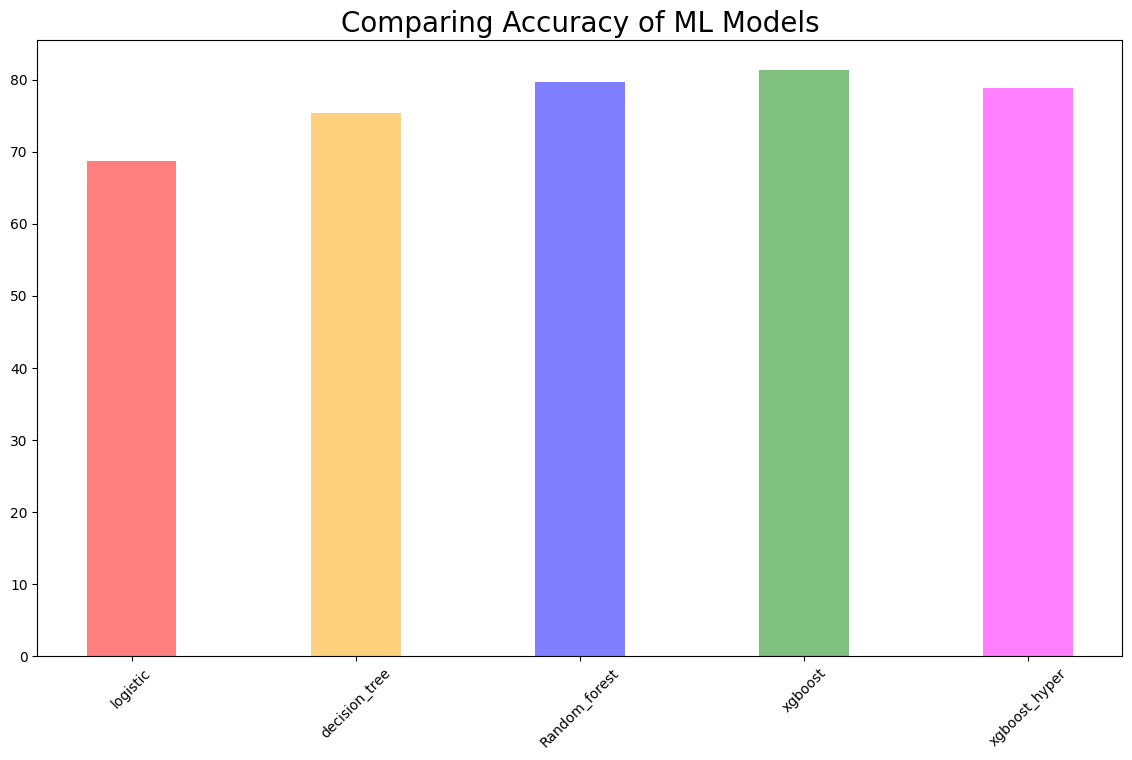

In [61]:
plt.figure(figsize=(14,8))
plt.title('Comparing Accuracy of ML Models', fontsize=20)
colors=['red','orange','blue','green','magenta'
]
plt.bar(courses, values, color= colors, alpha=0.5, width=0.4)
plt.xticks(rotation=45)


# **Conclusion**

* In this project, we first check for data unbalancing, visualize the feature and investigate in the relationship between different feature to find the strongest predictors of default payment.

* We then run different 5 ML models in order to find the best model for detecting credit default:

* Logistic model with 68.65% accuracy,
* Decision_tree model with 75.36% accuracy,
* Random_forest model with 79.73% accuracy,
* XGboost model with 81.4% accuracy,
* XGboost_hyperparameter model with 78.85% accuracy

Among all the ML model we use to predict the default credit card, XGboost is the best model with highest accuracy score.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***